In [38]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [39]:
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes',
'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

In [40]:
#Print number of countries by landmass, or continent
print(df.landmass.value_counts())

#Create a new dataframe with only flags from Europe and Oceania
df_36 = df[df['landmass'].isin([3,6])]
df_36.head(2)

landmass
4    52
5    39
3    35
1    31
6    20
2    17
Name: count, dtype: int64


,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red


In [41]:
#Create labels for only Europe and Oceania
labels = df_36['landmass']
labels

1      3
3      6
4      3
10     6
11     3
16     3
26     3
41     6
44     3
45     3
46     3
55     3
57     6
58     3
59     3
61     6
64     3
65     3
67     3
68     3
71     6
79     3
80     3
82     6
85     3
87     3
94     6
101    3
102    3
108    3
109    6
113    6
114    3
119    6
121    3
123    6
127    6
130    3
134    6
137    6
138    3
139    3
142    3
144    3
151    6
156    3
165    3
166    3
172    6
177    6
180    3
185    6
186    3
189    6
190    3
Name: landmass, dtype: int64

In [42]:
#Print the variable types for the predictors
df_36[var].dtypes

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object

In [43]:
#Create dummy variables for categorical predictors
data = pd.get_dummies(df_36[var])

In [44]:
#Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=80)

In [45]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = list(range(1, 21))
acc_depth = []
for i in depths:
  dtm = DecisionTreeClassifier(max_depth = i)
  dtm.fit(x_train, y_train)
  y_pred = dtm.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  acc_depth.append([acc, i])
depths, acc_depth

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [[0.7272727272727273, 1],
  [0.8181818181818182, 2],
  [0.8181818181818182, 3],
  [0.8181818181818182, 4],
  [0.8181818181818182, 5],
  [0.8181818181818182, 6],
  [0.8181818181818182, 7],
  [0.8181818181818182, 8],
  [0.8181818181818182, 9],
  [0.8181818181818182, 10],
  [0.8181818181818182, 11],
  [0.8181818181818182, 12],
  [0.8181818181818182, 13],
  [0.8181818181818182, 14],
  [0.8181818181818182, 15],
  [0.8181818181818182, 16],
  [0.8181818181818182, 17],
  [0.8181818181818182, 18],
  [0.8181818181818182, 19],
  [0.8181818181818182, 20]])

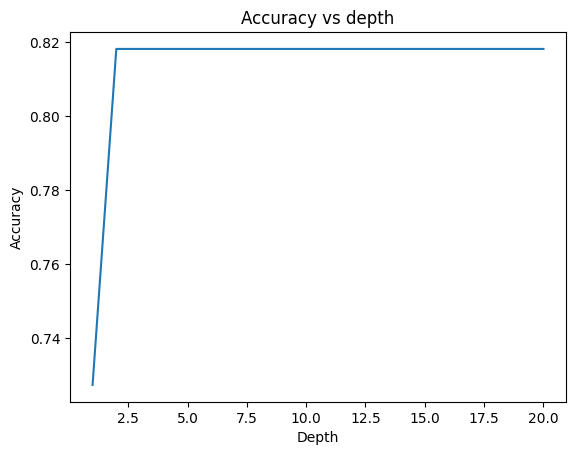

<Figure size 640x480 with 0 Axes>

In [46]:
#Plot the accuracy vs depth
plt.plot(depths, [accuracy[0] for accuracy in acc_depth])
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs depth')
plt.show()
plt.clf()

In [47]:
#Find the largest accuracy and the depth this occurs
max_acc = max(acc_depth)
max_acc

[0.8181818181818182, 20]

In [48]:
max_depth_list = [elem[1] for elem in acc_depth if elem[0] == max_acc[0]]
print(max_depth_list[0])
m_depth = max_depth_list[0]
m_depth

2


2

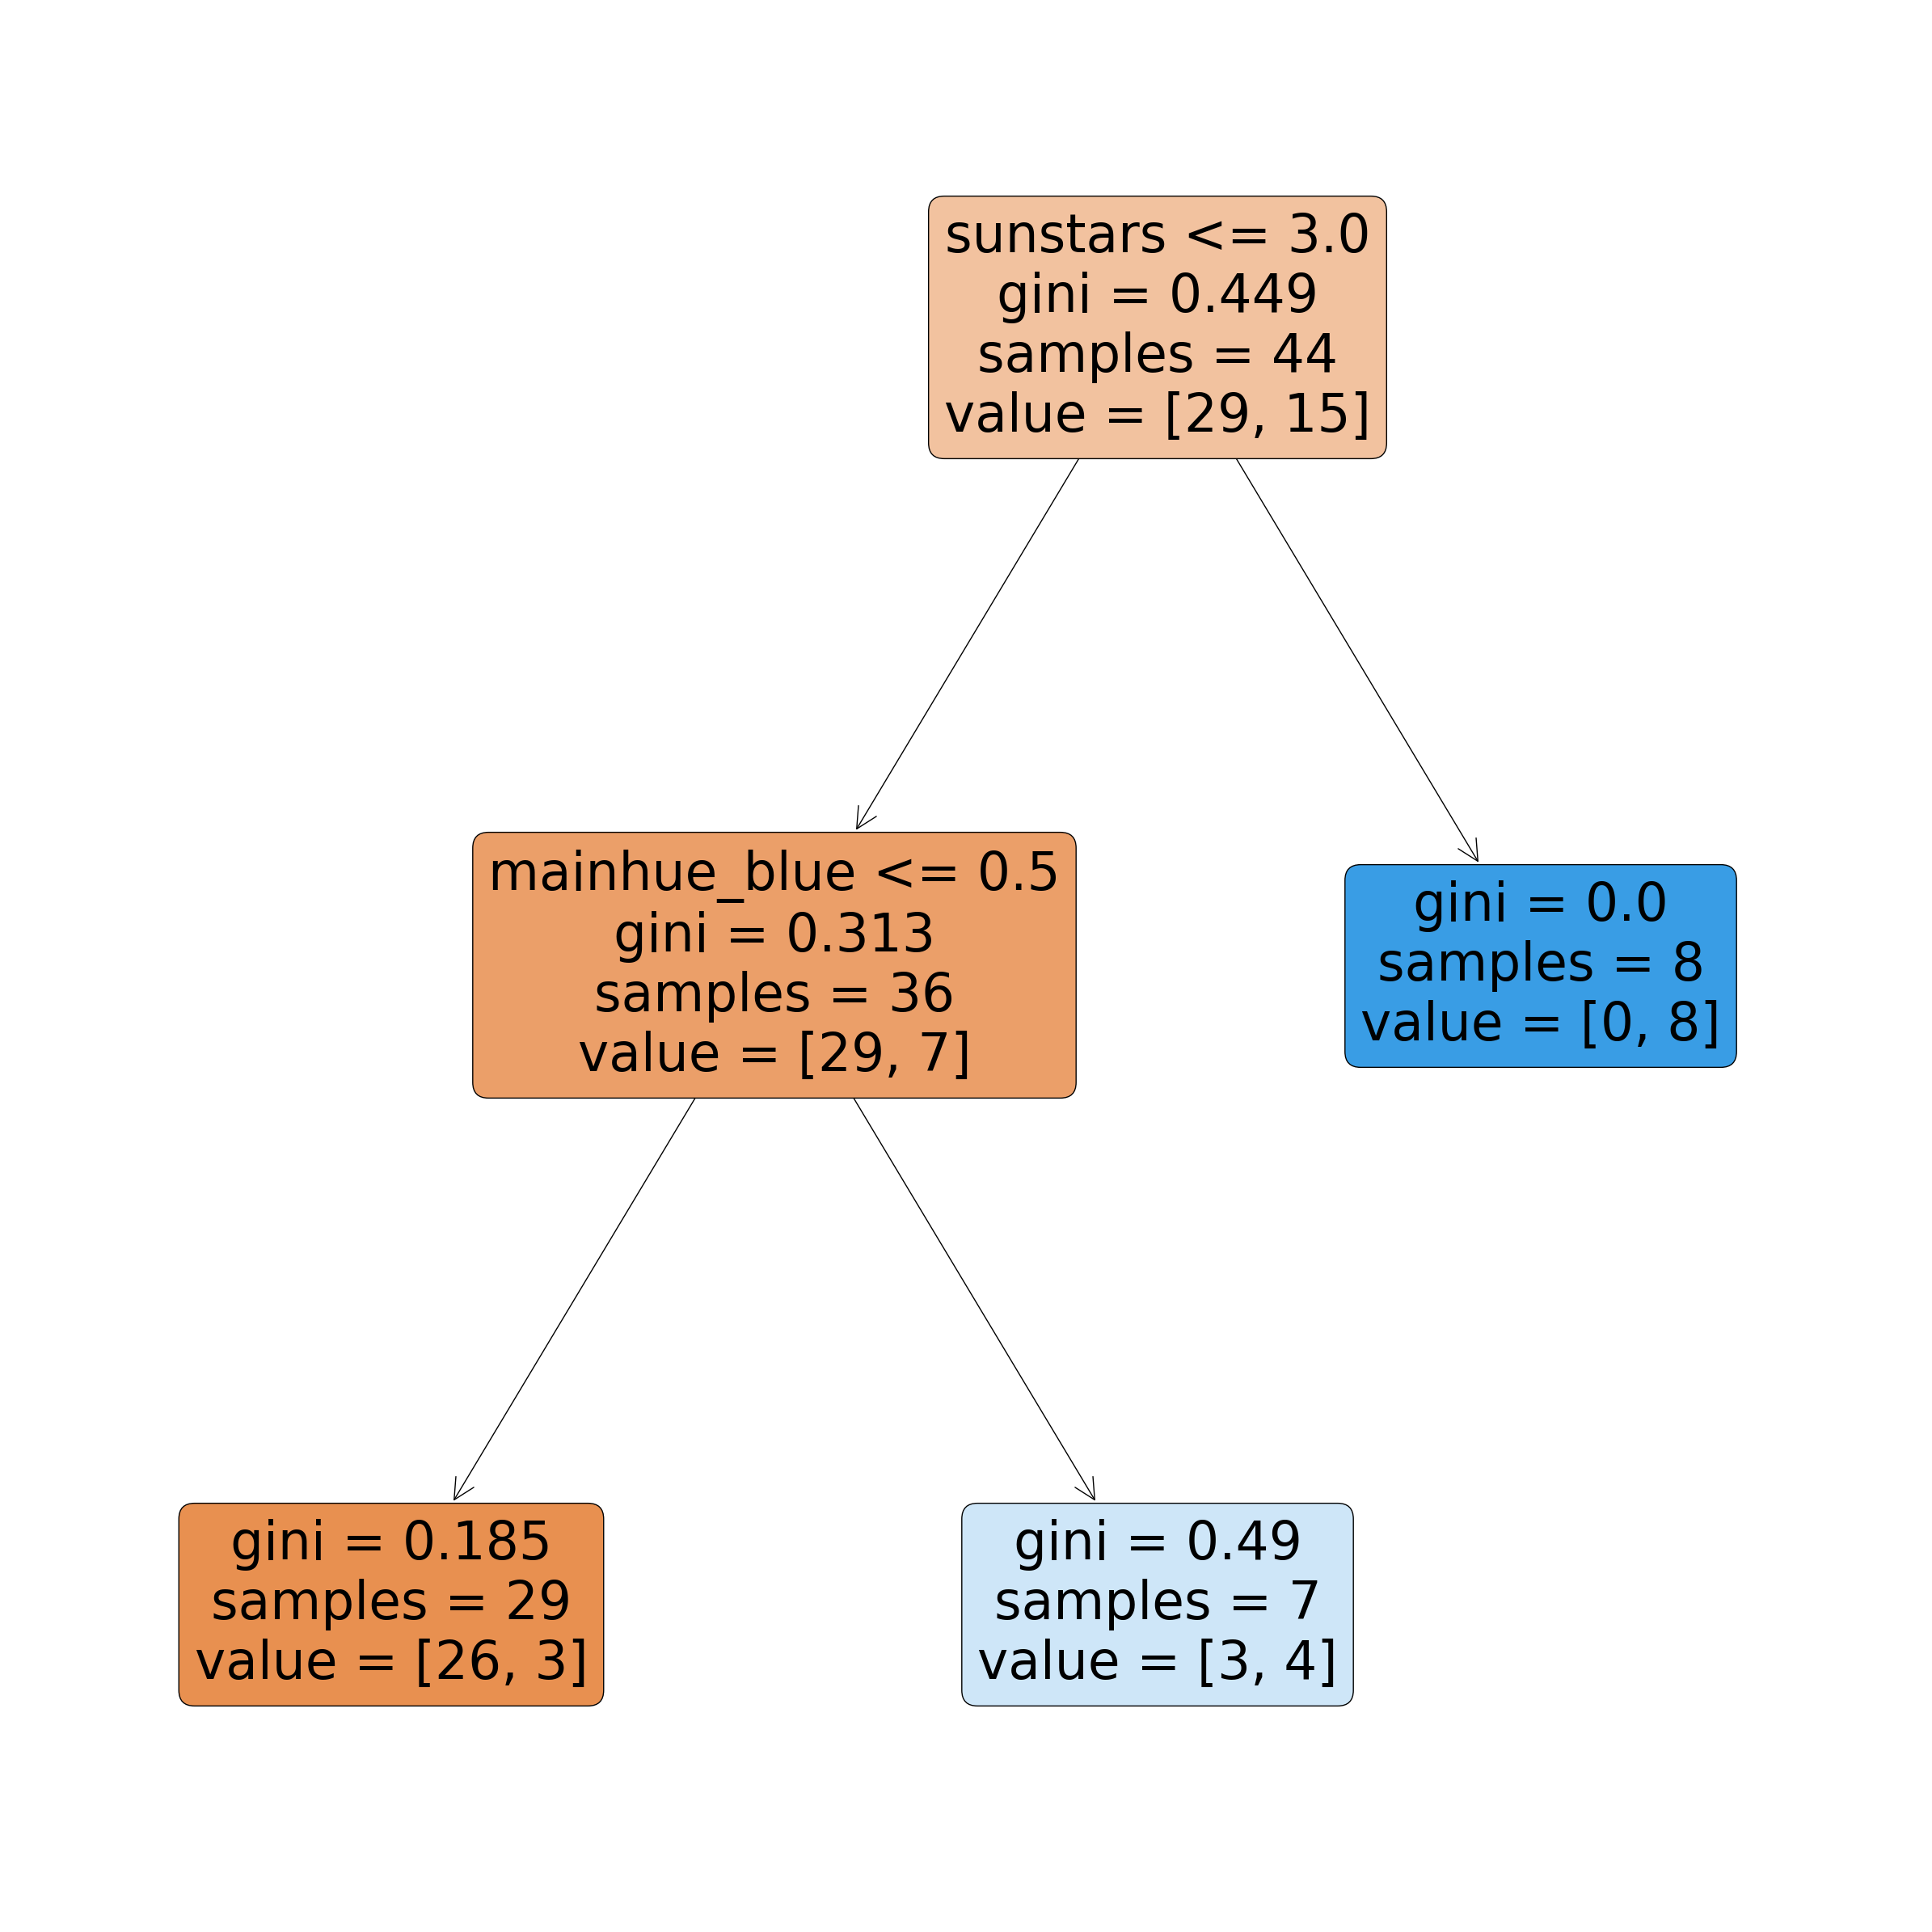

<Figure size 640x480 with 0 Axes>

In [49]:
#Refit decision tree model with the highest accuracy and plot the decision tree
dtm_n = DecisionTreeClassifier(max_depth = m_depth, ccp_alpha=0.01, criterion='gini')
dtm_n.fit(x_train, y_train)
plt.figure(figsize=[24, 24])
tree.plot_tree(dtm_n, feature_names=x_train.columns.to_list(), max_depth=m_depth, label='all', filled=True, rounded=True)
plt.tight_layout()
plt.show()
plt.clf()

In [50]:
#Create a new list for the accuracy values of a pruned decision tree.  Loop through
#the values of ccp and append the scores to the list
ccp_alpha_list = np.logspace(-3, 0, num=20)
print(ccp_alpha_list)
acc_pruned = []
for i in ccp_alpha_list:
  dtm = DecisionTreeClassifier(random_state=1, max_depth = m_depth, ccp_alpha = i)
  dtm.fit(x_train, y_train)
  y_pred = dtm.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  acc_pruned.append(acc)
#print(acc_pruned)

[0.001      0.00143845 0.00206914 0.00297635 0.00428133 0.00615848
 0.00885867 0.01274275 0.01832981 0.02636651 0.0379269  0.05455595
 0.078476   0.11288379 0.16237767 0.23357215 0.33598183 0.48329302
 0.6951928  1.        ]


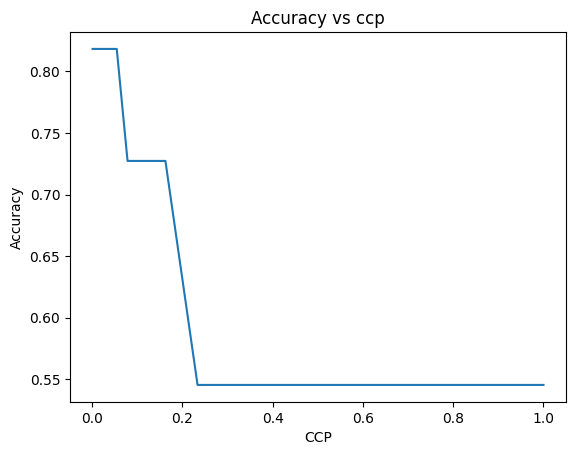

<Figure size 640x480 with 0 Axes>

In [51]:
#Plot the accuracy vs ccp_alpha
plt.plot(ccp_alpha_list, acc_pruned)
plt.xlabel('CCP')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp')
plt.show()
plt.clf()

In [52]:
#Find the largest accuracy and the ccp value this occurs
print(acc_pruned)
print(np.max(acc_pruned))
print(ccp_alpha_list[np.argmax(acc_pruned)])
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dtm_best = DecisionTreeClassifier(max_depth = m_depth, ccp_alpha = ccp_alpha_list[np.argmax(acc_pruned)], criterion='gini')
dtm_best.fit(x_train, y_train)

[0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454]
0.8181818181818182
0.001


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=2)

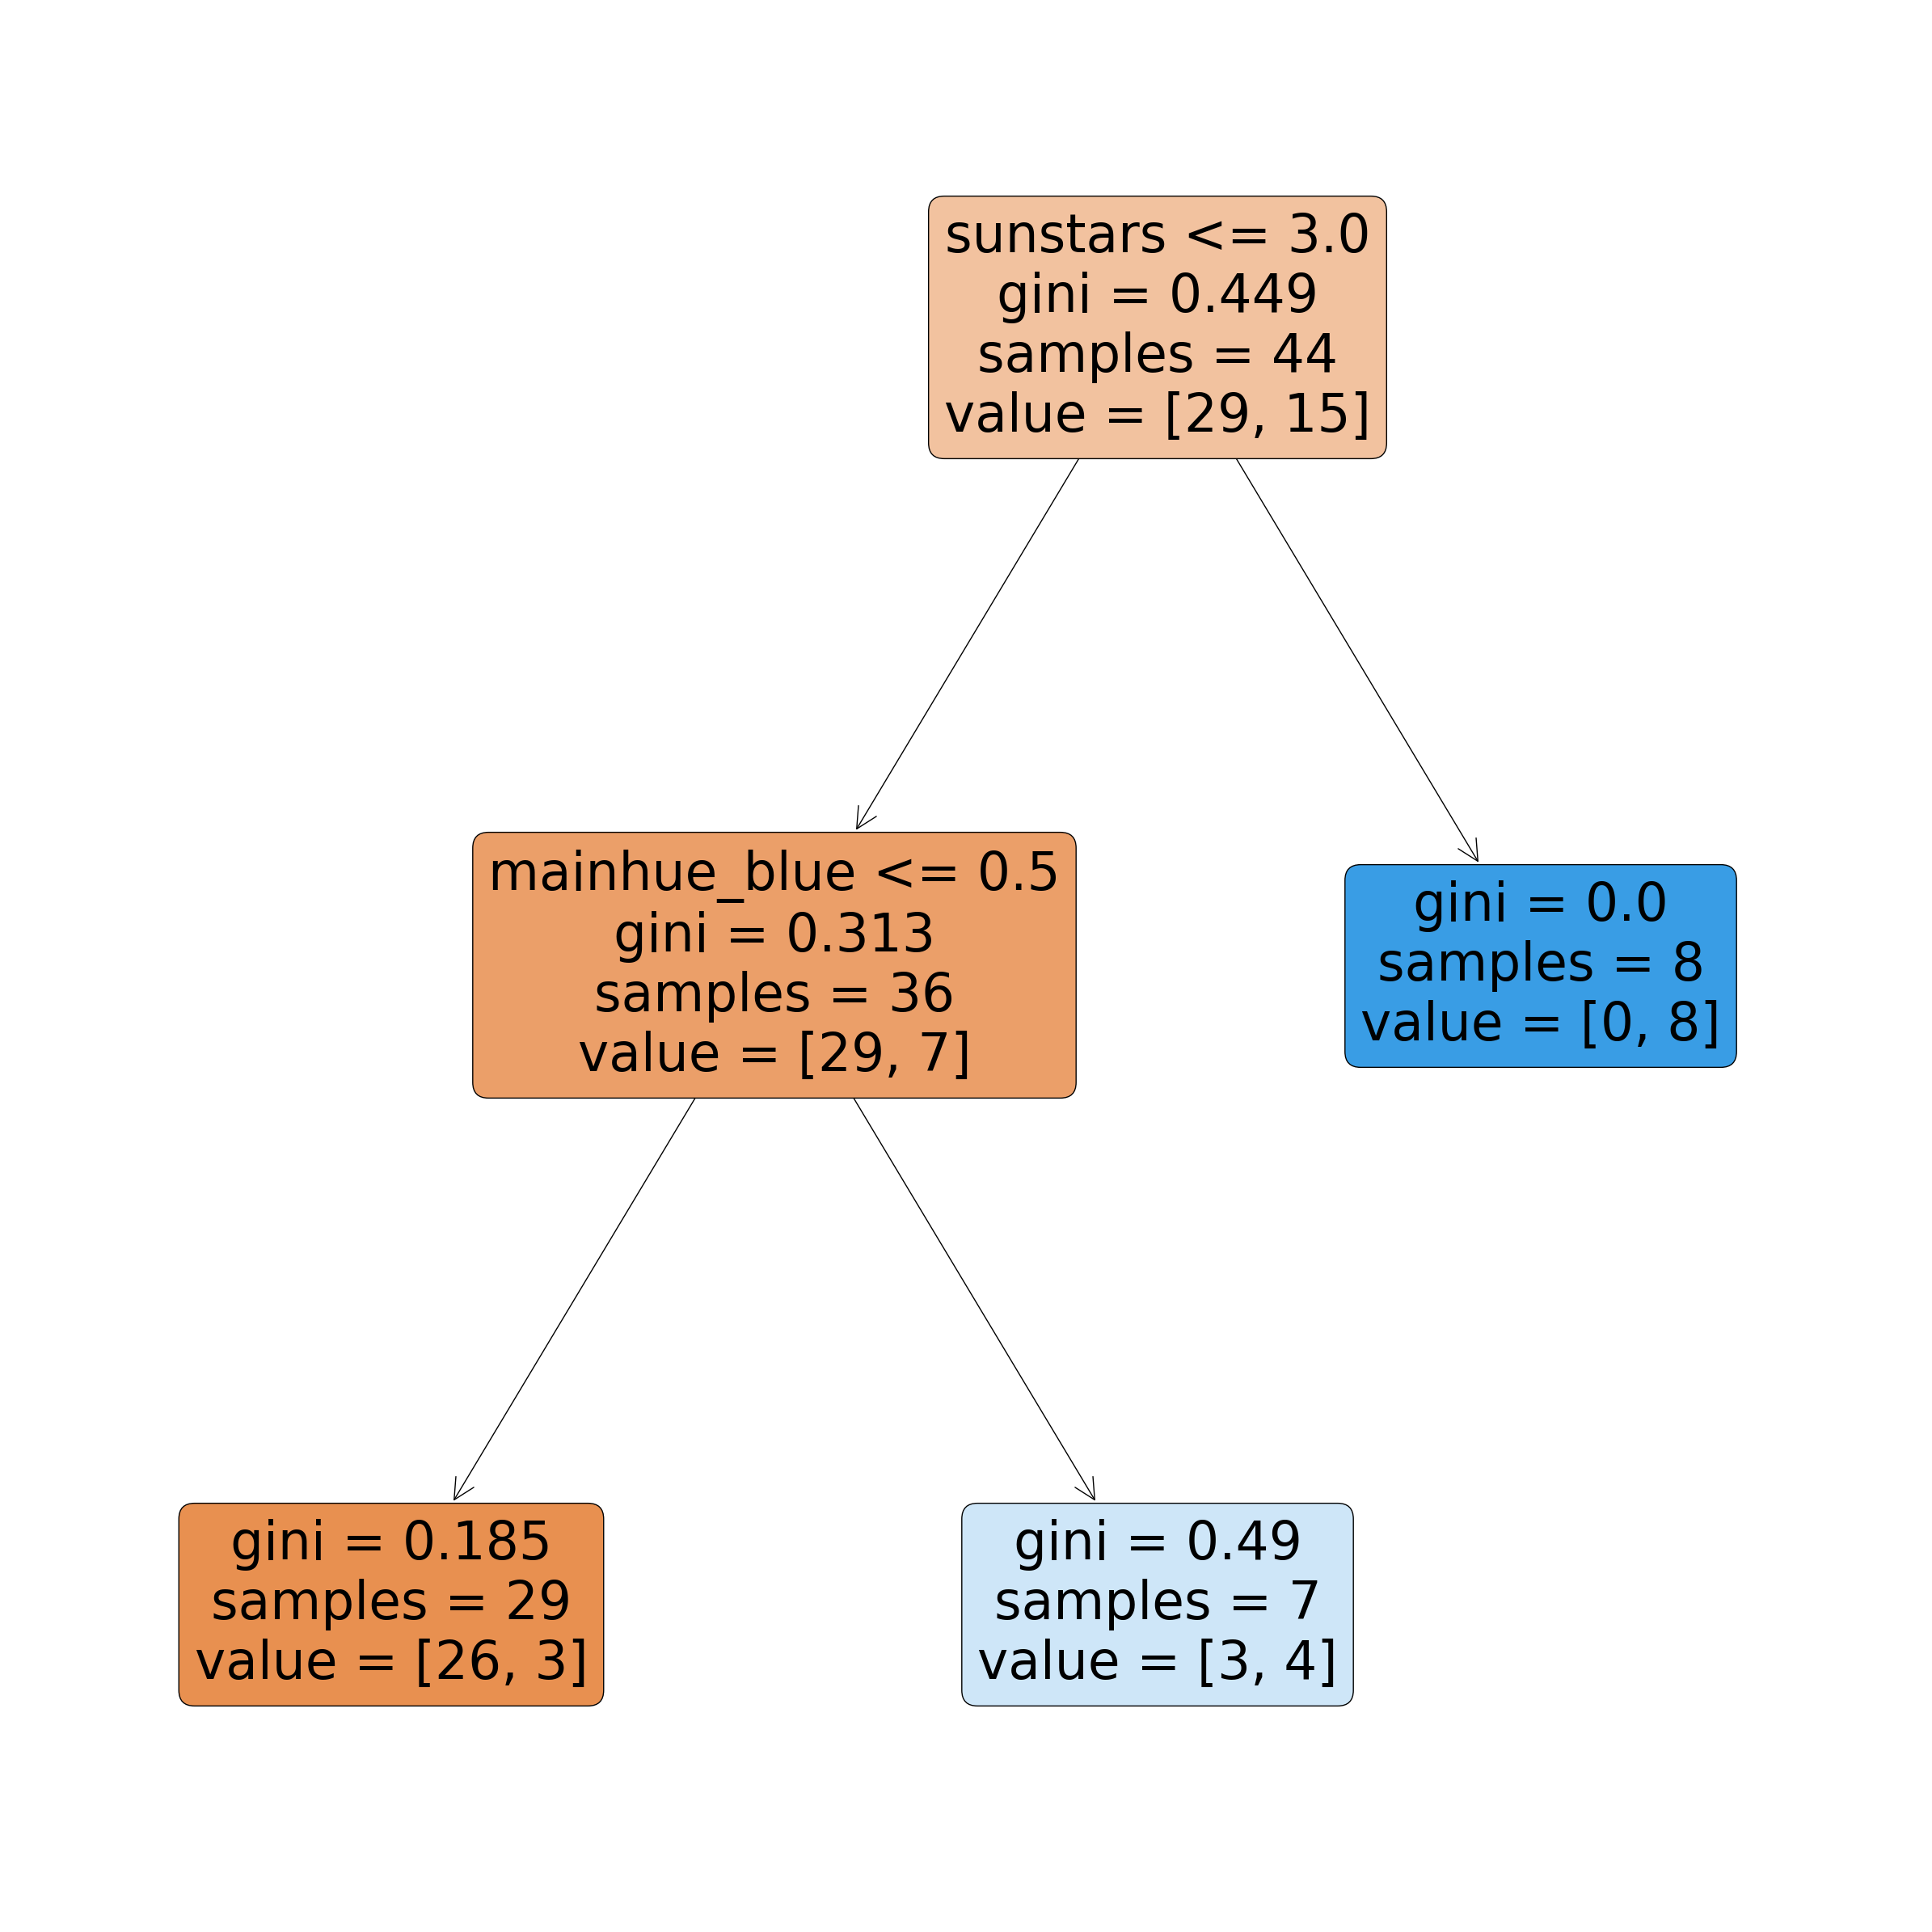

<Figure size 640x480 with 0 Axes>

In [53]:
#Plot the final decision tree
plt.figure(figsize=[24, 24])
tree.plot_tree(dtm_best, feature_names=x_train.columns.to_list(), max_depth=m_depth, label='all', filled=True, rounded=True)
plt.tight_layout()
plt.show()
plt.clf()